**ANALISIS EXPLORATORIO DE DATOS**

*En esta notebook se realiza un análisis exploratorio de los datos (EDA)*

*Este trabajo es muy importante para poder encontrar relaciones entre las diferentes variables del dataset, analizar si hay outliers o anomalías e identificar patrones que resulten interesantes.* 

*Es un trabajo fundamental previo a cualquier modelo de Machine Learning*


Si bien corresponde a un ETL, en esta seccion ya hay un foco en el Modelo a aplicar y por lo tanto tambien se realizara la imputacion o eliminacion de aquellos registros con valores faltantes


In [215]:
pip install matplotlib


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [216]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [217]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [218]:
ruta_archivo = os.path.join('Dataset', 'df_etl.csv')    #Lo descargamos con ruta relativa a la carpeta actual
df_eda = pd.read_csv(ruta_archivo)



In [219]:
df_eda.info()    #Analizamos la info. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43328 entries, 0 to 43327
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                43328 non-null  float64
 1   genres                43328 non-null  object 
 2   id                    43328 non-null  int64  
 3   original_language     43317 non-null  object 
 4   overview              42411 non-null  object 
 5   popularity            43328 non-null  float64
 6   production_companies  43328 non-null  object 
 7   production_countries  43328 non-null  object 
 8   release_date          43328 non-null  object 
 9   revenue               43328 non-null  int64  
 10  runtime               43089 non-null  float64
 11  spoken_languages      43328 non-null  object 
 12  status                43250 non-null  object 
 13  title                 43328 non-null  object 
 14  vote_average          43328 non-null  float64
 15  vote_count         

In [220]:
df_eda.columns    #Dejamos a mano el nombre de las columnas

Index(['budget', 'genres', 'id', 'original_language', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'title',
       'vote_average', 'vote_count', 'collection_name', 'genre_name',
       'genre_id', 'release_year', 'release_month', 'release_day', 'return',
       'Actors', 'Director'],
      dtype='object')

In [221]:
# Analizamos los valores Nan que haya el Data Set ya que no deben quedar vacios. 
#Opcion 1 Eliminar las filas con Valores Nan
#Opcion 2 Imputar Valores

In [222]:
null_counts = df_eda.isnull().sum()
null_counts


budget                    0
genres                    0
id                        0
original_language        11
overview                917
popularity                0
production_companies      0
production_countries      0
release_date              0
revenue                   0
runtime                 239
spoken_languages          0
status                   78
title                     0
vote_average              0
vote_count                0
collection_name           0
genre_name                0
genre_id                  0
release_year              0
release_month             0
release_day               0
return                    0
Actors                    1
Director                  1
dtype: int64

In [223]:
#analizamos una a una cada una de las columnas con datos faltantes
df_eda[df_eda['original_language'].isnull()]

,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,...,vote_count,collection_name,genre_name,genre_id,release_year,release_month,release_day,return,Actors,Director
18933,0.0,"[{'id': 99, 'name': 'Documentary'}]",283101,NaN,Documentary about the production of The Third ...,0.017007,"[{'name': 'StudioCanal', 'id': 694}, {'name': ...","[{'iso_3166_1': 'AT', 'name': 'Austria'}, {'is...",2004-10-11,0,...,0.0,No hay datos,['Documentary'],[99],2004,Octubre,Lunes,0.0,"['John Hurt', 'Guy Hamilton', 'Angela Allen', ...",Frederick Baker
20853,0.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 18, ...",103902,NaN,An Outback farmer takes in an Afghani woman wh...,0.359818,"[{'name': 'New Holland Pictures', 'id': 10229}...","[{'iso_3166_1': 'AU', 'name': 'Australia'}]",2007-08-04,0,...,8.0,No hay datos,"['Romance', 'Drama']","[10749, 18]",2007,Agosto,Sábado,0.0,"['William McInnes', 'Monic Hendrickx', 'Bille ...",Peter Duncan
22004,0.0,"[{'id': 10752, 'name': 'War'}, {'id': 37, 'nam...",359195,NaN,A group of Union Army soldiers is charged with...,0.070647,"[{'name': 'Associated Producers (API)', 'id': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",1960-03-31,0,...,0.0,No hay datos,"['War', 'Western']","[10752, 37]",1960,Marzo,Jueves,0.0,"['Grant Williams', 'Brad Dexter', 'Carole Math...",Harry W. Gerstad
30731,0.0,"[{'id': 35, 'name': 'Comedy'}]",147050,NaN,George and Gracie enter an elegant drawing roo...,0.073418,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1929-10-31,0,...,2.0,No hay datos,['Comedy'],[35],1929,Octubre,Jueves,0.0,"['George Burns', 'Gracie Allen']",Murray Roth
35727,0.0,"[{'id': 16, 'name': 'Animation'}]",257095,NaN,The first fairy tale transformed into a full-l...,0.036841,"[{'name': 'Ceskoslovenský Státní Film', 'id': ...","[{'iso_3166_1': 'CZ', 'name': 'Czech Republic'}]",1950-01-26,0,...,1.0,No hay datos,['Animation'],[16],1950,Enero,Jueves,0.0,[],Jiří Trnka
39142,0.0,"[{'id': 99, 'name': 'Documentary'}]",332742,NaN,"Until the late 1970s, the Pakistani city of La...",0.373688,[],[],2015-11-13,0,...,2.0,No hay datos,['Documentary'],[99],2015,Noviembre,Viernes,0.0,[],Andy Schocken
39919,0.0,"[{'id': 99, 'name': 'Documentary'}]",144410,NaN,Two dancers perform in succession facing a sta...,1.584340,"[{'name': 'Edison Manufacturing Company', 'id'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1895-04-01,0,...,20.0,No hay datos,['Documentary'],[99],1895,Abril,Lunes,0.0,['Annabelle Moore'],William Heise
42005,0.0,"[{'id': 18, 'name': 'Drama'}]",380438,NaN,NaN,0.001283,[],"[{'iso_3166_1': 'FR', 'name': 'France'}]",2001-01-01,0,...,0.0,No hay datos,['Drama'],[18],2001,Enero,Lunes,0.0,"['Irène Jacob', 'Christopher Thompson', 'Joach...",Jacques Deray
42344,0.0,"[{'id': 16, 'name': 'Animation'}, {'id': 99, '...",381096,NaN,The traditional crafts of crochet and knitting...,0.067624,[],[],2016-03-12,0,...,0.0,No hay datos,"['Animation', 'Documentary']","[16, 99]",2016,Marzo,Sábado,0.0,"['Tinna Thorudottir Thorvaldar', 'Olek', 'Tosh...",Heather Millard
42501,0.0,[],381525,NaN,American investment fund buys Austrian compani...,0.030766,[],"[{'iso_3166_1': 'AT', 'name': 'Austria'}]",2016-01-27,0,...,0.0,No hay datos,[],[],2016,Enero,Miércoles,0.0,[],Gerald Kerkletz


Descubrimos que en estos 11 registros tambien hay varias columnas que no tienen datos, por lo tanto se decide eliminar estos registros del data set

In [224]:
df_eda = df_eda.dropna(subset=['original_language'])


In [225]:
#Continuamos con Overview

df_eda[df_eda['overview'].isnull()]

#En este caso vamos a eliminar aquellos registros que tengan ademas valores faltantes en Popularity o que su cantidad de votos sea menor a 2000
df_eda = df_eda.dropna(subset=['overview'])[(df_eda['popularity'].isnull() | (df_eda['popularity'] == 0)) | (df_eda['vote_count'] < 2000)]


/var/folders/pg/6tnf5ljd1g9chcxb2v299hyh0000gn/T/ipykernel_45743/2836426965.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_eda = df_eda.dropna(subset=['overview'])[(df_eda['popularity'].isnull() | (df_eda['popularity'] == 0)) | (df_eda['vote_count'] < 2000)]


In [226]:
#Como la columna status tiene solamente 62 valores nulos, decidimos imputar un valor: "Sin Datos"

df_eda['status'] = df_eda['status'].fillna('Sin datos')


In [227]:
#Por ultimo eliminamos las filas que tienen datos faltantes del actor y director
df_eda.dropna(subset=['Director', 'Actors'], inplace=True)


In [228]:
df_eda.isnull().sum()  #Verifiquemos que ya no haya valores Nulls

budget                  0
genres                  0
id                      0
original_language       0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
title                   0
vote_average            0
vote_count              0
collection_name         0
genre_name              0
genre_id                0
release_year            0
release_month           0
release_day             0
return                  0
Actors                  0
Director                0
dtype: int64

**COMENZAMOS CON EL EDA MAS PROFUNDO**

In [229]:
#Analizamos las columnas Budget y Revenue
#Se observa que la gran mayoria de registrios tienen un valor CERO y que tambien hay outliers debido al cambio entre el promedio y la mediana

print(df_eda.budget.describe())
print(df_eda.revenue.describe())

count    4.192700e+04
mean     3.226221e+06
std      1.272573e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.700000e+08
Name: budget, dtype: float64
count    4.192700e+04
mean     6.700278e+06
std      3.246353e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      7.469213e+08
Name: revenue, dtype: float64


Analizamos la Columna vote_count. No tendremos en cuenta aquellas peliculas que tengan una valoracion menor a 2000 votos. 

In [230]:
count_less_than_2000 = (df_eda['vote_count'] < 20).sum()
print(count_less_than_2000)


27466


Analisis de OUTLIERS

In [231]:
df_eda.vote_count

2          92.0
3          34.0
4         173.0
5        1886.0
6         141.0
          ...  
43323       1.0
43324       1.0
43325       3.0
43326       0.0
43327       0.0
Name: vote_count, Length: 41927, dtype: float64

           budget                                             genres      id  \
2             0.0  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   15602   
4             0.0                     [{'id': 35, 'name': 'Comedy'}]   11862   
5      60000000.0  [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...     949   
9      58000000.0  [{'id': 12, 'name': 'Adventure'}, {'id': 28, '...     710   
12            0.0  [{'id': 10751, 'name': 'Family'}, {'id': 16, '...   21032   
...           ...                                                ...     ...   
43239         0.0                     [{'id': 35, 'name': 'Comedy'}]   79927   
43242         0.0                  [{'id': 16, 'name': 'Animation'}]  460135   
43244         0.0  [{'id': 35, 'name': 'Comedy'}, {'id': 80, 'nam...  426272   
43255         0.0  [{'id': 35, 'name': 'Comedy'}, {'id': 27, 'nam...  434873   
43303         0.0  [{'id': 10751, 'name': 'Family'}, {'id': 16, '...  455661   

      original_language                

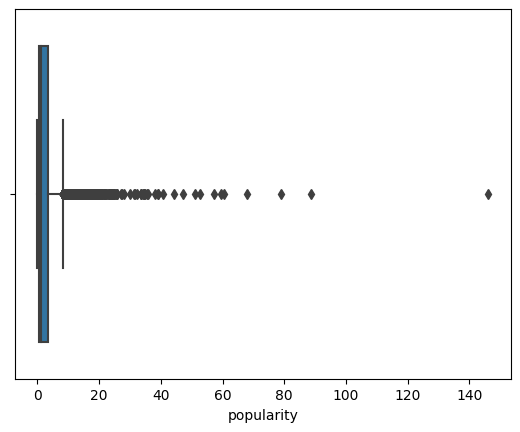

In [232]:

# Crear un boxplot de la columna "popularity"
sns.boxplot(x=df_eda['popularity'])

# Calcular los límites de los valores atípicos
Q1 = df_eda['popularity'].quantile(0.25)
Q3 = df_eda['popularity'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Identificar los valores atípicos
outliers = df_eda[(df_eda['popularity'] < lower_limit) | (df_eda['popularity'] > upper_limit)]
print(outliers)


In [233]:
# Se decide eliminar todos los outliers encontrados. Ya que son pocos en relacion al tamaño del deta set y en este trabajo se valora resultados rapidos

df_eda = df_eda.drop(outliers.index)


En funcion de encuentas realizadas a diferentes personas, se ha llegado a la conclusion de que los atributos que mas se tienen en cuenta a la hora de elegir una pelicula es:

POPULARIDAD, GENERO, IDIOMA ORIGINAL, ACTOR

Por lo tanto hacemos un breve análisis de una de estas columnas antes de iniciar el Modelo

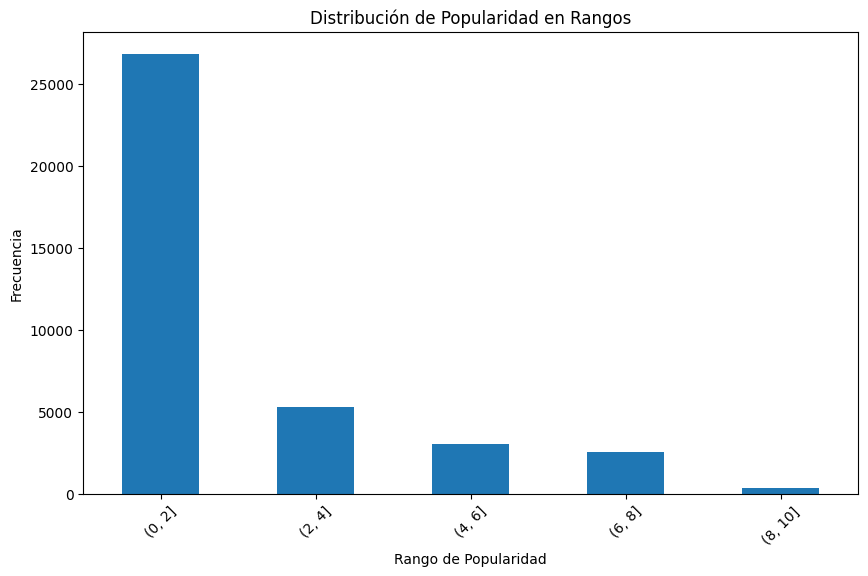

In [234]:

# Definir los rangos para la columna "popularity"
ranges = [0, 2, 4, 6, 8, 10]

# Crear una nueva columna "popularity_range" que contiene el rango al que pertenece cada valor de "popularity"
df_eda['popularity_range'] = pd.cut(df_eda['popularity'], bins=ranges)

# Contar la frecuencia de cada rango
popularity_counts = df_eda['popularity_range'].value_counts().sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
popularity_counts.plot(kind='bar')
plt.xlabel('Rango de Popularidad')
plt.ylabel('Frecuencia')
plt.title('Distribución de Popularidad en Rangos')
plt.xticks(rotation=45)
plt.show()


*Esto nos hace dar una idea que hay muchos valores faltantes en esta columna*

**ANALISIS DE PELICULAS SEGUN IDIOMA ORIGINAL**

In [235]:
language_counts = df_eda['original_language'].value_counts()
print(language_counts)


original_language
en    26512
fr     2092
ja     1264
it     1216
de      905
      ...  
ay        1
fy        1
rw        1
qu        1
si        1
Name: count, Length: 88, dtype: int64


In [236]:
# Como nuestro Modelo de ML se basara en esta columna, y por tratarse de un trabajo de un junior para practicar
#vamos a limitar el data set a aquellas peliculas con los 10 idiomas con mayores frecuencias

In [237]:
language_counts = df_eda['original_language'].value_counts()
top_10_languages = language_counts.head(10)
print(top_10_languages)


original_language
en    26512
fr     2092
ja     1264
it     1216
de      905
es      871
ru      760
hi      484
ko      427
zh      384
Name: count, dtype: int64


In [238]:
top_10_languages = language_counts.head(10).index
df_eda = df_eda[df_eda['original_language'].isin(top_10_languages)]


In [239]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


**NUBE DE PALABRAS DE LA COLUMNA TITULO**

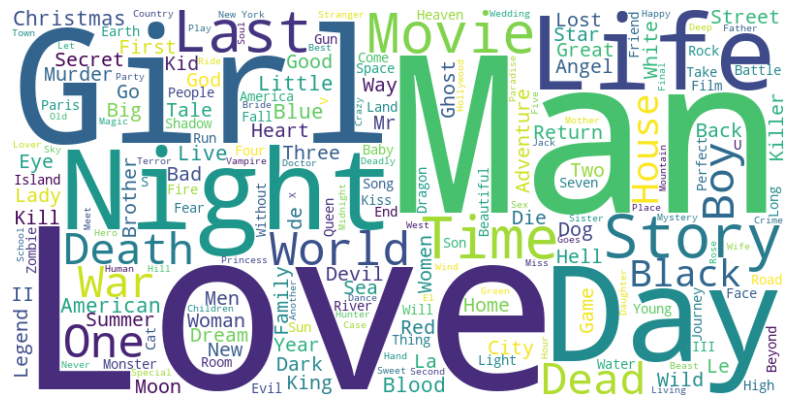

In [240]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Concatenar todos los títulos en un solo texto
titles_text = ' '.join(df_eda['title'])

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(titles_text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


**COLUMNA ACTORS**
Quiero eliminar todos los registros que no tengan dato de actores

In [241]:
import re

df_eda['first_actor'] = df_eda['Actors'].apply(lambda x: re.search(r"'(.*?)'", x).group(1) if re.search(r"'(.*?)'", x) else None)



In [242]:
df_eda['first_actor']  ## VERIFICO!

3               Whitney Houston
6                 Harrison Ford
7        Jonathan Taylor Thomas
8         Jean-Claude Van Damme
10              Michael Douglas
                  ...          
43322           Tony Abatemarco
43323                Monty Bane
43324                Lisa Boyle
43326          Iwan Mosschuchin
43327                      None
Name: first_actor, Length: 34915, dtype: object

In [ ]:
# elimino todos los registros que no tengan datos del primer actor

In [243]:
df_eda.dropna(subset=['first_actor'], inplace=True)


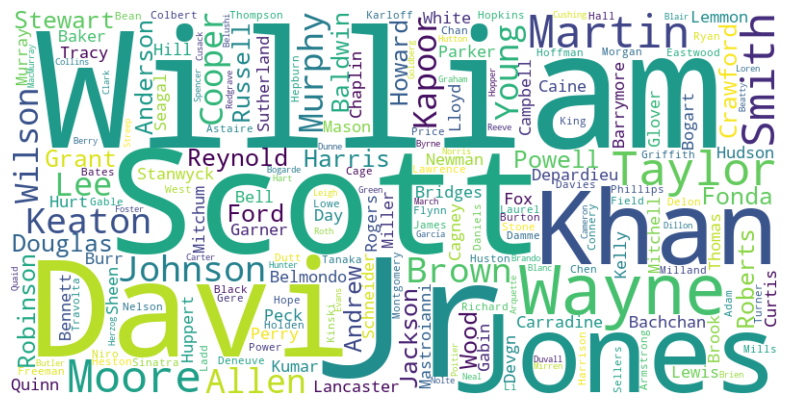

In [247]:

# Extraer la última palabra de cada cadena en la columna first_actor para identificar el apellido
df_eda['last_word'] = df_eda['first_actor'].str.split().str[-1]

# Concatenar todas las últimas palabras en una cadena de texto
text = ' '.join(df_eda['last_word'].dropna().values)

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Visualizar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [248]:
df_eda.columns

Index(['budget', 'genres', 'id', 'original_language', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'title',
       'vote_average', 'vote_count', 'collection_name', 'genre_name',
       'genre_id', 'release_year', 'release_month', 'release_day', 'return',
       'Actors', 'Director', 'popularity_range', 'first_actor', 'last_word'],
      dtype='object')

In [250]:
#Almacenamos el DATAFRAME para poder usarlo en el Modelo

In [251]:

# Ruta del archivo de salida
output_path = "/Users/compu/Documents/Henry/PI/Dataset/df_eda.csv"

# Guardar el DataFrame en un archivo CSV
df_eda.to_csv(output_path, index=False)
